In [1]:
##########################################################
#  Python script template for Question 1 (IAML Level 11)
#  Note that
#  - You should not change the name of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

In [46]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml01cw2_helpers import *
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
# from iaml01cw2_my_helpers import *

# Data Normalization

<b>Step1</b>: Make a back up of Xtrn and Xtst by copying Xtrn to Xtrn_orig and Xtst to Xtst_orig.


In [39]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST('../q1_data')

In [40]:
Xtrn_orig, Ytrn, Xtst_orig, Ytst = load_FashionMNIST('../q1_data')

<br>
<b>Step 2</b> Divide each element of Xtrn and Xtst by 255.0. (NB: Xtrn and Xtst are over- written as a result.)

In [41]:
xtrn=np.divide(Xtrn,255)
xtst=np.divide(Xtst,255)

<br>
<b>Step 3</b> Calculate the mean value of Xtrn for each dimension (i.e. column) and store the result in a vector, Xmean, whose shape is (784,).

In [42]:
Xmean=np.mean(xtrn, axis=0)
Xmean.shape

(784,)

<br>
<b>Step 4</b> Subtract Xmean from each row of Xtrn and Xtst, and store the result in Xtrn_nm and Xtst_nm, respectively.

In [43]:
Xtrn_nm = xtrn-Xmean
Xtst_nm = xtst-Xmean

### 1.1 (3 points) 
Once you have applied the normalisation from Step 1 to Step 4 above, report the values of the first 4 elements for the first training sample in Xtrn_nm, i.e. Xtrn_nm[0,:] and the last training sample, i.e. Xtrn_nm[-1,:].

In [59]:
# print("{:.3e}".format(Xtrn_nm[0,:4]))
# print(format(Xtrn_nm[0,:4], ".3E"))
# 1.1
def iaml01cw2_q1_1():
    print(list(map('{:.3e}'.format,Xtrn_nm[0,:4])))
    print(list(map('{:.3e}'.format,Xtrn_nm[-1,:4])))
iaml01cw2_q1_1()

['-3.137e-06', '-2.268e-05', '-1.180e-04', '-4.071e-04']
['-3.137e-06', '-2.268e-05', '-1.180e-04', '-4.071e-04']


<b>1.2 (4 points)</b><br> 

In [61]:
trn_final = np.column_stack((Xtrn_orig,Ytrn))
df_trn = pd.DataFrame(trn_final)

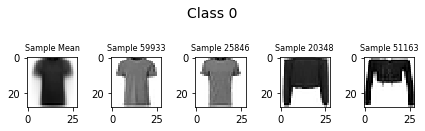

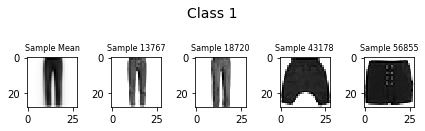

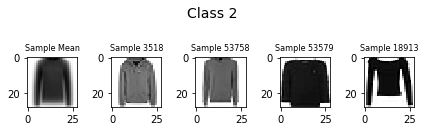

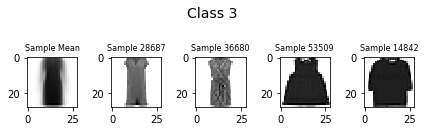

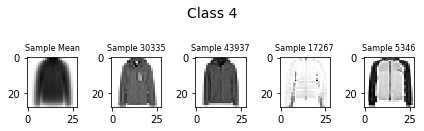

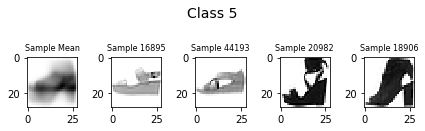

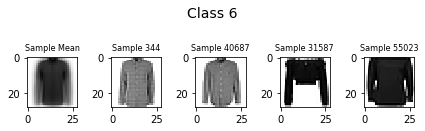

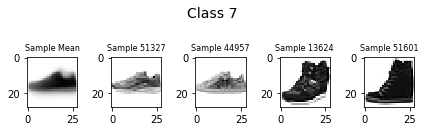

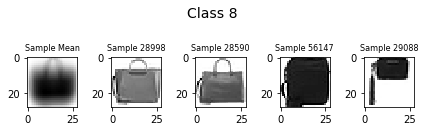

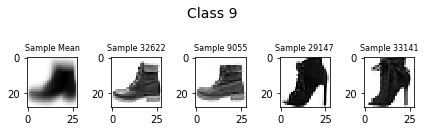

In [88]:
# Compute the mean of each class
def iaml01cw2_q1_2():
    def getMean(df):
        meanArray = []
        for i in range(0,10):
            everyClass = df[df[df.columns[-1]] == i]
            classMean = everyClass.mean(axis=0)
            meanArray.append(classMean)
        return meanArray

    # Find the four required samples
    def calEveryClass(data, mean):

        # Initialize
        vector = data.iloc[0]
        dist = np.linalg.norm(mean-vector)
        vector1 = vector
        dist1 = dist
        vector2 = vector
        dist2 = dist
        vector4 = vector
        dist4 = dist
        vector3 = vector
        dist3 = dist

        # Get the distance 
        for i in range(1, len(data)):

            temVec = data.iloc[i]
            temDist = np.linalg.norm(mean-temVec)

            if dist1 > temDist:
                vector2 = vector1
                dist2 = dist1
                vector1 = temVec
                dist1 = temDist

            elif dist1 <= temDist <= dist2:
                vector2 = temVec
                dist2 = temDist

            elif temDist > dist4:
                vector3 = vector4
                dist3 = dist4
                vector4 = temVec
                dist4 = temDist

            elif dist3 <= temDist <= dist4:
                vector3 = temVec
                dist3 = temDist

        return vector2, vector2, vector3, vector4

    # # Find all samples for each class
    def finalResults():
        trn_final = np.column_stack((Xtrn_orig,Ytrn))
        df_trn = pd.DataFrame(trn_final)
        classMeanArray = getMean(df_trn)
        selectedSamples = []

        for i in range (0,10):
            classSamples = df_trn[df_trn[df_trn.columns[-1]] == i]
            classMean = classMeanArray[i]
            result = calEveryClass(classSamples, classMean)
                del row[784]
            selectedSamples.append(result)

        return selectedSamples

    fourResult = finalResults()
    meanList = getMean(df_trn.drop([784],axis=1))

    # plot 
    for rowIndex in range(len(fourResult)):
    fig, ax = plt.subplots(1,5)
    rowData = fourResult[rowIndex]
    rowData = (meanList[rowIndex],)+rowData
    plt.suptitle('Class {}'.format(rowIndex), fontsize=14)
    for index, sample in enumerate(rowData):
        sampleName = sample.name
        imageData = sample.values.reshape((28,28))
        ax[index].imshow(imageData, cmap='gray_r')
        if sampleName == None:
            sampleName = 'Mean'
        ax[index].set_title('Sample {}'.format(sampleName),fontsize=8)

    plt.tight_layout()
    plt.subplots_adjust(top=1.4)

    plt.show()


<b>1.3 (3 points) </b> <br>
    Apply Principal Component Analysis (PCA) to the data of Xtrn_nm using sklearn.decomposition.PCA, and report the variances of projected data for the first five principal components in a table. Note that you should use Xtrn_nm instead of Xtrn.

In [21]:
from sklearn.decomposition import PCA
pca= PCA(n_components=5).fit(Xtrn_nm)
pca.explained_variance_

array([19.80980567, 12.11221047,  4.10615661,  3.38182839,  2.62477022])

<b>1.4 (3 points) </b> <br>
    Plot a graph of the cumulative explained variance ratio as a function of the number of principal components, K, where 1 ≤ K ≤ 784. Discuss the result briefly.

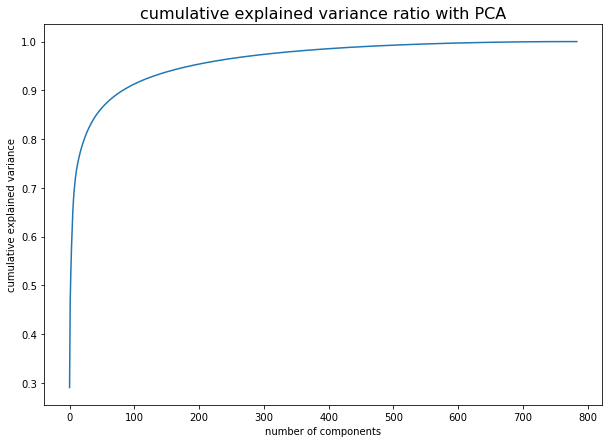

In [22]:
def iaml01cw2_q1_4():
    pca = PCA().fit(Xtrn_nm)

    fig=plt.figure(figsize=(10, 7))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.title('cumulative explained variance ratio with PCA',fontsize=16)
    plt.show()
    
    fig.savefig('./results/q1_4.img.png')

iaml01cw2_q1_4()

<b>1.5 (4 points)</b><br> Display the images of the first 10 principal components in a 2-by-5 grid, putting the image of 1st principal component on the top left corner, followed by the one of 2nd component to the right. Discuss your findings briefly.

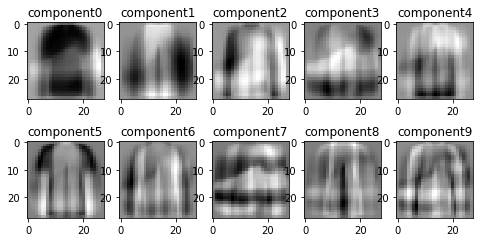

In [23]:
def iaml01cw2_q1_5():
    pca=PCA(n_components=10).fit(Xtrn_nm)
    
    col = 5
    row = 2
    
    fig,ax = plt.subplots(row,col,figsize=(8,4))
    
    for i in range(row):
        for j in range(col):
            img = pca.components_[i * col + j].reshape(28,28)
            ax[i,j].imshow(img,cmap='binary')
            ax[i,j].set_title('component{}'.format(i * col + j))
            
    fig.savefig('./results/q1_5.img.png')
    
iaml01cw2_q1_5()

<b>1.6 (5 points)</b><br>
Using Xtrn_nm, for each class and for each number of principal components K = 5,20,50,200, apply dimensionality reduction with PCA to the first sample in the class, reconstruct the sample from the dimensionality-reduced sample, and report the Root Mean Square Error (RMSE) between the original sample in Xtrn_nm and reconstructed one.
You should report this using a table, in which each row corresponds to class and each column corresponds to a value of K.

In [32]:
from math import sqrt
def iaml01cw2_q1_6():
    df_trn = pd.DataFrame(np.column_stack((Xtrn_nm,Ytrn)))
    
    def seperateClass(df):
        
        everyClass = []
        
        for i in range(10):
            temClass = df[df[df.columns[-1]] == i].drop([784],axis=1)
            everyClass.append(temClass)
        
        return everyClass    
    
    def =(pca, proData):
        reData = pca.inverse_transform(proData)
        reClass = reData[0,:]
        return reClass

    def RMSE(numOfComponents, classData):
        pca = PCA(n_components=numOfComponents)
        pca.fit(Xtrn_nm)
        pcaProcessedData = pca.transform(classData)
        reconstructed = reconstructSample(pca, proData)
        return sqrt(mean_squared_error(classData.iloc[0], reconstructed))
    
    K_Array = [5,20,50,200]

    for i in range(10):
        currentClass = seperateClass(df_trn)[i]
        for k in K_Array:
            result = RMSE(k,currentClass)
            print(f"Class {i} with K={k} components: {result}")


            
iaml01cw2_q1_6()

Class 0 with K=5 components: 0.2561486649761395
Class 0 with K=20 components: 0.15003033587285514
Class 0 with K=50 components: 0.12711782366215726
Class 0 with K=200 components: 0.05963704416228598
Class 1 with K=5 components: 0.19802439578347367
Class 1 with K=20 components: 0.14043540074069258
Class 1 with K=50 components: 0.0953228970859839
Class 1 with K=200 components: 0.03679027078987499
Class 2 with K=5 components: 0.19870015649184955
Class 2 with K=20 components: 0.1456545413703279
Class 2 with K=50 components: 0.12373420726488298
Class 2 with K=200 components: 0.07971215431615711
Class 3 with K=5 components: 0.14565797917822337
Class 3 with K=20 components: 0.10722219038027551
Class 3 with K=50 components: 0.08346432750405762
Class 3 with K=200 components: 0.05547578517263545
Class 4 with K=5 components: 0.11820870312544887
Class 4 with K=20 components: 0.10263398151553275
Class 4 with K=50 components: 0.08734208525039266
Class 4 with K=200 components: 0.045874463801444415
Cl

<b>1.7 (4 points)</b><br> 
Display the image for each of the reconstructed samples in a 10-by-4 grid, where each row corresponds to a class and each row column corresponds to a value of K = 5, 20, 50, 200.
Note that you should add Xmean to each reconstructed sample to display the corresponding image. Discuss your findings briefly.

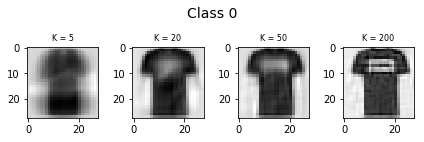

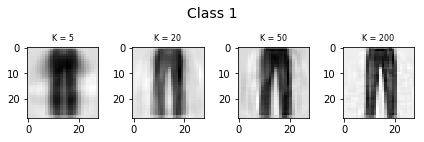

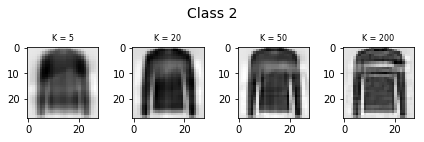

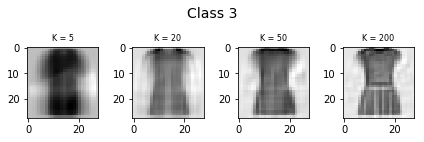

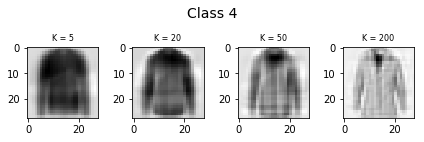

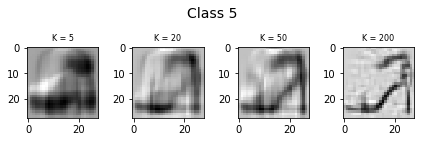

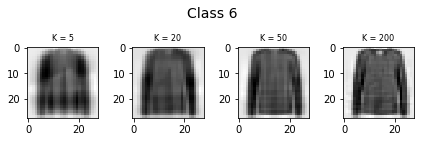

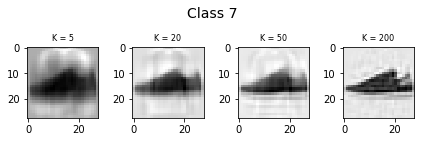

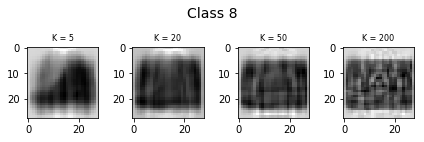

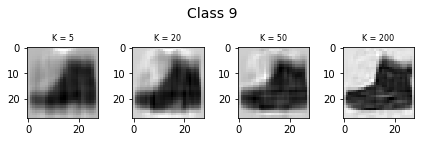

In [81]:
def iaml01cw2_q1_7():
    K = [5,20,50,200]
    
    def seperateClass(df):
        
        everyClass = []
        
        for i in range(10):
            temClass = df[df[df.columns[-1]] == i].drop([784],axis=1)
            everyClass.append(temClass)
        
        return everyClass
    
    def newResult(pca, pcaProcessedData):
        newData = pca.inverse_transform(pcaProcessedData)
        newClass = newData[0,:]
        return newClass
    
    classArray = seperateClass(df_trn)

    for i in range(10):
        fig, ax = plt.subplots(1, 4)
        currentClass = classArray[i]
        plt.suptitle(f'Class {i}', fontsize=14)
        for j in range(4):
            pca = PCA(n_components=K[j])
            pca.fit(Xtrn_nm)
            pcaProcessedData = pca.transform(currentClass)
            reconstructedSample = newResult(pca, pcaProcessedData)
            newImg = (reconstructedSample + Xmean).reshape((28,28))
            ax[j].imshow(newImg,cmap='gray_r')
            ax[j].set_title(f"K = {K[j]}",fontsize=8)
        plt.tight_layout()
        plt.subplots_adjust(top=1.4)
        
        fig.savefig('./results/q1_7_{}.img.png'.format(i))

iaml01cw2_q1_7()

<b>1.8 (4 points)</b><br> Plot all the training samples (Xtrn_nm) on the two-dimensional PCA plane you obtained in Question 1.3, where each sample is represented as a small point with a colour specific to the class of the sample. Use the ’coolwarm’ colormap for plotting. Give comments on the separation of the classes, and explain your findings briefly.

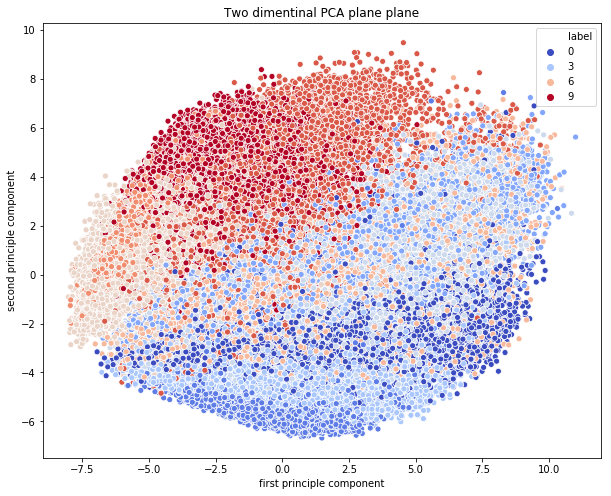

(60000,)


In [57]:
def iaml01cw2_q1_8():
    pca = PCA(n_components=2).fit_transform(Xtrn_nm)
    
    pca_data = pd.DataFrame(pca,columns=['x','y'])
    pca_data['label'] = Ytrn 
    fig = plt.figure(figsize=(10,8))
    
#     vals=range(10)
#     c_norm = plt.colors.Normalize(vmin=0,vmax=vals[-1])
#     c_mapping = plt.cm.ScalarMappable(norm=c_norm,cmap='coolwarm')
    
    sns.scatterplot(data=pca_data,
                    x='x',
                    y='y',
                    palette='coolwarm',
                    hue='label')
    
#     for i in range(10):
#         color = scamap.to_rgba(vals[i])
#         plt.scatter(pca[Ytrn==i,0],
#                     pca[Ytrn==i,1], 
#                     cmap = plt.cm.coolwarm,
#                     c=color,
#                     label='class'+str(i))
        
#         plt.colorbar(scamap)
    plt.title('Two dimentinal PCA plane plane')
    plt.xlabel('first principle component')
    plt.ylabel('second principle component')
        
    plt.legend()
    plt.show()
    fig.savefig('./results/q1_8.img.png')
    print(Ytrn.shape)
    
iaml01cw2_q1_8()


<b>1.9 (4 points)</b><br> We here compare PCA with Discrete Cosine Transform (DCT), which is an- other technique for dimensionality reduction with cosine functions at different frequencies. PCA transforms a D-dimensional vector, x = (x1, x2, . . . , xD) to a K-dimensional vector, z = (z1, . . . , zK ) by projecting x to a vector space spanned by K eigenvectors (i.e. prin- cipal components), where 1 ≤ K ≤ D. The k-th element of z is given by the inner (dot) product between x and vk:

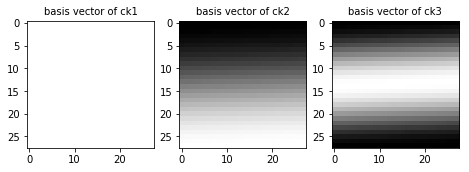

In [24]:
def iaml01cw2_q1_9():
    import math
    
    fig,axs = plt.subplots(1,3)
    K=[1,2,3]
    for k in K:
        ck=[]
        for d in range(1, 785):
            tem = np.cos(np.pi *(k-1)*(2*d-1)/(2*784))
            ck.append(tem)
            
        data = np.array(ck).reshape(28,28)
    
        #     draw image
        axs[k-1].imshow(data,cmap='gray_r')
        axs[k-1].set_title('basis vector of ck{}'.format(k),fontsize=10)
#         ax.subplots_adjust(left=3,right=4)
        fig.savefig('./results/q1_9.img.png')
    
    plt.subplots_adjust(left=3,right=4)
   

iaml01cw2_q1_9()

<b>1.10 (4 points) </b><br>
    Apply DCT to Xtrn_nm and calculate the variance, Var(z(DCT)), for k = k
1,...,D.
To compare DCT with PCA, on a single graph, plot the cumulative explained variance
ratio for both DCT and PCA, using ’red’ for DCT and ’blue’ for PCA. (Note that you
should have basically the same graph for PCA as the one obtained in Question 1.4.)
Hint: Var(z(DCT)) is the variance of the samples transformed or projected with DCT’s k
k-th basis vector ck.

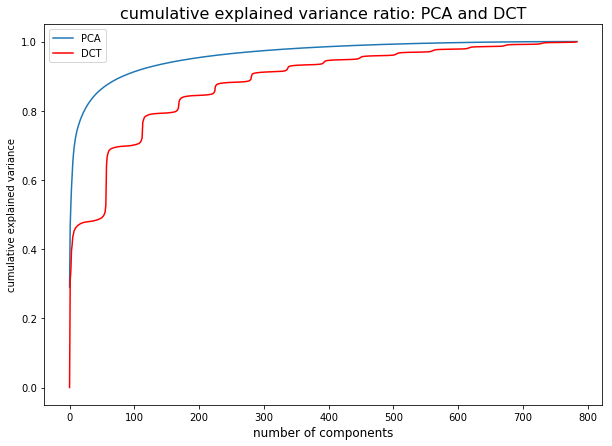

In [26]:
def iaml01cw2_q1_10():
    D=784
    K=range(1,D+1)
    dctVar = []
    varSum = 0
    cki=[]
    for k in K:
        for i in range(1, D+1):
            tem = np.cos(np.pi *(k-1)*(2*i-1)/(2*784))
            cki.append(tem)
        ck = np.array(cki)
        cki=[]
        z = np.dot(Xtrn_nm,ck)
        zVar = np.var(z)
        dctVar.append(zVar)
        varSum +=zVar
    
    varList = []
    for i in dctVar:
        varList.append(i/varSum)
    
    cevPct=[]
    for i in range(1,D+1):
        tem = sum(varList[:i-1])
        cevPct.append(tem)
    
    pca = PCA().fit(Xtrn_nm)

    fig=plt.figure(figsize=(10, 7))
    plt.plot(np.cumsum(pca.explained_variance_ratio_),label='PCA')
    plt.plot(cevPct,c='r',label='DCT')
    plt.xlabel('number of components',fontsize=12)
    plt.ylabel('cumulative explained variance')
    plt.title('cumulative explained variance ratio: PCA and DCT',
              fontsize=16)
    plt.legend()
    plt.show()
    
    fig.savefig('./results/q1_10.img.png')
    
iaml01cw2_q1_10()